In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction import DictVectorizer

# DIFFERENT CELL LYNES
df_encoders = pd.read_csv('HelaS3_data.csv')
df_classes = pd.read_csv('HelaS3_labels.csv') 
# df_encoders = pd.read_csv('HepG2.csv')
# df_classes = pd.read_csv('HepG2_classes.csv') 
# df_encoders = pd.read_csv('K562_data.csv')
# df_classes = pd.read_csv('K562_labels.csv') 

# CLASSES TO LABELS
df_labels = np.asarray(df_classes)
le = LabelEncoder()
le.fit(df_labels)
labels_1 = le.transform(df_labels)

# ENCODERS TO FEATURES 
features_0 = df_encoders.to_numpy()
features_1 = features_0[1:,1:]

In [267]:
# ADJUSTING LABELS FOR PROBLEM 1
# mask = (labels_1 == 0) | (labels_1 == 2) # A-P or A-E
# features = features_1[mask]
# labels_2 = labels_1[mask]
# labels = (labels_2 == 2)

# ADJUSTING LABELS FOR PROBLEM 2
labels = (labels_1 == 0) | (labels_1 == 2) # A-P or A-E
features = features_1


In [268]:
# RESAMPLING 
from imblearn.over_sampling import SMOTE 
sm = SMOTE(random_state=42)
features, labels = sm.fit_resample(features, labels)

In [269]:
# SPLITTING DATA INTO TRAINING SET AND TEST SET
from sklearn.model_selection import train_test_split
features_train, features_test, labels_train, labels_test = train_test_split(features, labels, test_size=0.25, 
                                                                            random_state=42)

In [ ]:
# MODEL TRAINING

# MODEL USED FOR PROBLEM 1
# from sklearn import tree
# clf = tree.DecisionTreeClassifier()

# MODEL USED FOR PROBLEM 2
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()


# OTHER POPULAR MODELS WORTH EXPERIMENTING WITH

# from sklearn.neural_network import MLPClassifier
# clf = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5, 2), random_state=1)

# from sklearn.neighbors.nearest_centroid import NearestCentroid
# clf = NearestCentroid()

# from sklearn.linear_model import SGDClassifier
# clf = SGDClassifier(loss="hinge", penalty="l2", max_iter=5)

# from sklearn.svm import SVC
# clf = SVC()

clf.fit(features_train, labels_train)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=10)
clf.fit(features_train, labels_train)

In [271]:
# TEST ACCURACY
acc_test = clf.score(features_test, labels_test)
print ("Test Accuracy:", acc_test)

Test Accuracy: 0.9738643821280973


In [272]:
# TRAIN ACCURACY
acc_train = clf.score(features_train, labels_train)
print ("Train Accuracy:", acc_train)

Train Accuracy: 0.9991456579320783


In [273]:
# PRECISION AND RECALL
from sklearn.metrics import recall_score, precision_score

pred = clf.predict(features_test)
precision = precision_score(labels_test, pred, average="weighted")
recall = recall_score(labels_test, pred, average="weighted")

print ("Precision:", precision) 
print ("Recall:", recall) 

Precision: 0.9738818325890062
Recall: 0.9738643821280973


In [274]:
# AVERAGE PRECISION
from sklearn.metrics import average_precision_score
average_precision = average_precision_score(labels_test, pred)

print('Average precision-recall score: {0:0.2f}'.format(
      average_precision))

Average precision-recall score: 0.96


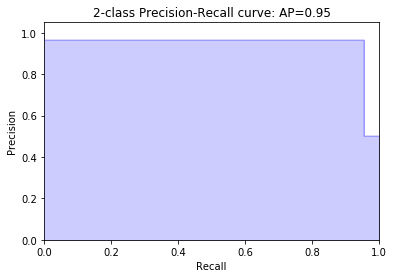

In [265]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt
from inspect import signature

precision, recall, _ = precision_recall_curve(labels_test, pred)

# In matplotlib < 1.5, plt.fill_between does not have a 'step' argument
step_kwargs = ({'step': 'post'}
               if 'step' in signature(plt.fill_between).parameters
               else {})
plt.step(recall, precision, color='b', alpha=0.2,
         where='post')
plt.fill_between(recall, precision, alpha=0.2, color='b', **step_kwargs)

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('2-class Precision-Recall curve: AP={0:0.2f}'.format(
          average_precision))
plt.savefig('PRC_pr1.png')

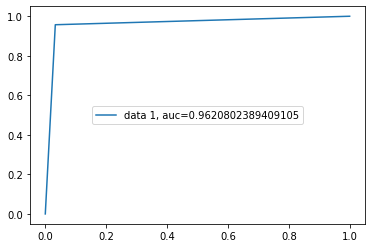

In [266]:
# ROC CURVE
from sklearn import metrics
import matplotlib.pyplot as plt

fpr, tpr, _ = metrics.roc_curve(labels_test, pred)
auc = metrics.roc_auc_score(labels_test, pred)
plt.plot(fpr, tpr, label="data 1, auc="+str(auc))
plt.legend(loc = 10)
plt.savefig('ROC_pr1.png')
plt.show()


In [ ]:
# OPTIONAL CROSS VALIDATION TEST (might take a couple of minutes to run)
from sklearn.model_selection import cross_val_score
scores = cross_val_score(clf, features_train, labels_train, cv=8)
scores